In [72]:
import numpy as np
import sklearn as sklearn
from math import exp, fabs

data1 = np.genfromtxt("data1.txt",dtype='i4')
data2 = np.genfromtxt("data2.txt",dtype='i4')
#print data1

In [73]:
def quadKernel(data, label):
    check = True
    a = np.zeros(len(data))
    b = 0
    while(check):
        check = False
        doublecheck = False
        for i in range(len(data)):
            oneData = 0
            for j in range(len(data)):
                oneData += a[j]*label[j]*((np.dot(data[j],data[i])+1)**2)+b
            if(oneData*label[i] <= 0):
                a[i] += 1
                b += label[i]
                doublecheck = True
        if(doublecheck == True):
            check = True
    return a, b

def rbfKernel(data, label,sig):
    check = True
    a = np.zeros(len(data))
    b = 0
    while(check):
        check = False
        doublecheck = False
        for i in range(len(data)):
            oneData = 0
            for j in range(len(data)):
                oneData += a[j]*label[j]*exp(-fabs(data[i]-data[j])/((2*sig)**2))+b
            if(oneData*label[i] <= 0):
                a[i] += 1
                b += label[i]
                doublecheck = True
        if(doublecheck == True):
            check = True
    return a, b

In [74]:
#data slicing
x_data1 = []
y_label1 = []

#data randomize
np.random.shuffle(data1)
np.random.shuffle(data2)

for a in range(len(data1)):
    data_temp = []
    label_temp = []
    data_temp.append(data1[a][0])
    data_temp.append(data1[a][1])
    y_label1.append(data1[a][2])
    x_data1.append(data_temp)

x_data2 = []
y_label2 = []    

for b in range(len(data2)):
    data_temp = []
    label_temp = []
    data_temp.append(data2[b][0])
    data_temp.append(data2[b][1])
    y_label2.append(data2[b][2])
    x_data2.append(data_temp)

In [75]:
def predict(a, b, data, label):
    predictor =[]
    for i in range(len(data)):
        oneData = 0
        predict = 0
        for j in range(len(data)):
            oneData += a[j]*label[j]*((np.dot(data[j],data[i])+1)**2)+b
        if(oneData*label[i] > 0):
            predictor.append(1)
        else:
            predictor.append(0)
    return predictor

In [76]:
#predict(x_data1, y_label1)
#print x_data1
#print y_label1


In [77]:
import matplotlib.pyplot as plt
from sklearn.linear_model import perceptron
from mlxtend.plotting import plot_decision_regions
a1, b1 = quadKernel(x_data1, y_label1)
a2, b2 = quadKernel(x_data2, y_label2)
xx1, xx2 = np.meshgrid(np.arange(0.5,10.5,0.005),np.arange(.5,10.5,0.005))
Z = predict(np.c(a1, b1, x_data1, y_label1))
Z = Z.reshape(xx1.shape)
plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.Pastel2, vmin=0, vmax=2)
plt.show()
result = predict(a1, b1, x_data1, y_label1)

AttributeError: 'module' object has no attribute 'c'

In [33]:
print result
print a1, b1
print a2, b2

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[ 1.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  0.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  1.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.
  1.  1.  0.  0.] 12
[   1.    0.    2.  101.  112.    7.    0.    0.   43.   39.   32.  110.
    7.   66.   44.    0.  132.   65.  111.    2.   14.   46.    0.   13.
    0.   36.    0.    7.   77.   67.   16.   11.   25.   14.   63.   69.
    1.  134.   40.  114.   29.    0.    0.   40.   20.   12.    5.    0.
    2.   84.    0.   10.   89.    0.    0.   93.   66.   29.   57.   30.] 65


C:\Python27\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


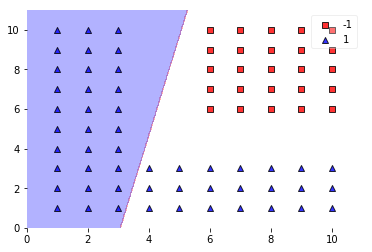

In [13]:
import matplotlib.pyplot as plt
from sklearn.linear_model import perceptron
from mlxtend.plotting import plot_decision_regions

graph = perceptron.Perceptron()
graph.coef_ = a1
graph.intercept_ = b1
graph.fit(x_data1,y_label1)
plot_decision_regions(np.array(x_data1), np.array(y_label1), clf=graph)
plt.show()

C:\Python27\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


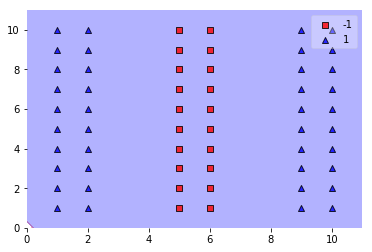

In [14]:
graph = perceptron.Perceptron(n_iter=100)
graph.coef_ = a2
graph.intercept_ = b2
graph.fit(x_data2,y_label2)
plot_decision_regions(np.array(x_data2), np.array(y_label2), clf=graph)
plt.show()

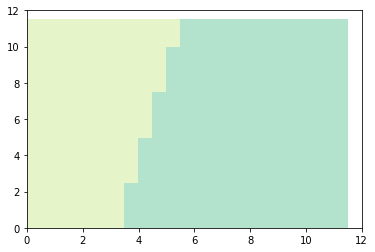

In [36]:
# Create mesh for plot
clf = perceptron.Perceptron(n_iter=100)
clf.coef_ = a1
clf.intercept_ = b1
clf.fit(x_data1, y_label1)
delta = 0.5
x1_min, x1_max = 0.0, 12.0
x2_min, x2_max = 0.0, 12.0
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, delta), np.arange(x2_min, x2_max, delta))
Z = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.Pastel2, vmin=0, vmax=2)
 
# Plot also the training points
#cols = ['ro', 'k^', 'b*']
#for label in range(0,3):
#    plt.plot(x_data1[Z==y_label1], x_data1[Z==y_label1], cols[y_label1], markersize=8)
#plt.xlabel(iris.feature_names[f1], fontsize=14)
#plt.ylabel(iris.feature_names[f2], fontsize=14)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.show()

In [84]:
for a in range(len(y_label2)):
    if(y_label2[a] == -1):
        y_label2[a] = 0

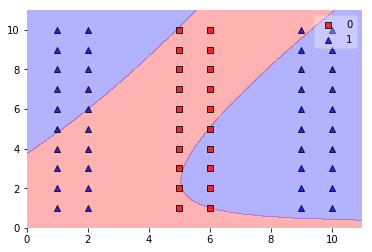

In [88]:
from sklearn.svm import SVC, LinearSVC
clf = SVC(C=12,kernel='poly')
#clf.coef_ = a1
#clf.intercept_ = b1
clf.fit(x_data2, y_label2)
plot_decision_regions(np.array(x_data2), np.array(y_label2), clf)
plt.show()

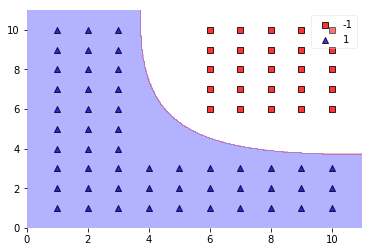

In [42]:
#plt.show()

In [ ]:
clf = SVC(C=0.001,kernel='poly',degree=7)
clf.fit(x_data2, y_label2)
plot_decision_regions(np.array(x_data2), np.array(y_label2), clf)

In [ ]:
plt.show()